In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
from torchvision import datasets, transforms
data_path = '../data'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


取十张照片作为一个图集

In [14]:
cifar10[0][0].shape

torch.Size([3, 32, 32])

In [15]:
img_list = torch.ones(10,3,32,32)
for i in range(10):
    img_list[i]=cifar10[i][0]
len(img_list)

10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

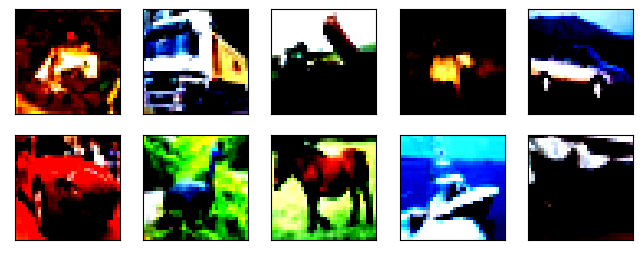

In [21]:
fig = plt.figure(figsize=(8,3))
for i in range(0):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    plt.imshow(img_list[i].permute(1,2,0))
plt.show()

In [22]:
from models.TextureReconstructionModule import ConvUp,ConvDown
A = ConvUp(3,2)
B = ConvDown(3,2)

In [41]:
img_list[0]

tensor([[[-1.0531e+00, -1.3072e+00,  ...,  4.2339e-01,  3.5989e-01],
         [-1.7358e+00, -1.9899e+00,  ..., -1.0054e-01, -5.2909e-02],
         ...,
         [ 8.6794e-01,  7.5681e-01,  ..., -4.4983e-01, -6.7210e-01],
         [ 8.2031e-01,  6.7742e-01,  ...,  4.0752e-01, -3.7033e-02]],

        [[-9.8219e-01, -1.2399e+00,  ...,  3.2427e-02,  1.6322e-02],
         [-1.6586e+00, -1.9807e+00,  ..., -6.4398e-01, -5.7956e-01],
         ...,
         [ 2.5790e-01,  2.1737e-04,  ..., -9.8219e-01, -1.1271e+00],
         [ 3.3842e-01,  9.6848e-02,  ..., -8.0308e-02, -4.9904e-01]],

        [[-7.6354e-01, -1.0334e+00,  ..., -1.7890e-01, -1.6391e-01],
         [-1.4081e+00, -1.7080e+00,  ..., -9.5842e-01, -8.5348e-01],
         ...,
         [-2.6884e-01, -1.0783e+00,  ..., -1.1983e+00, -1.1983e+00],
         [ 3.0971e-02, -2.9882e-01,  ..., -4.4873e-01, -6.2862e-01]]])

In [42]:

out = B(img_list)
out = A(out)
out.shape
out[1]

tensor([[[0.0331, 0.0332,  ..., 0.0365, 0.0251],
         [0.0391, 0.0474,  ..., 0.0437, 0.0334],
         ...,
         [0.0380, 0.0421,  ..., 0.0400, 0.0268],
         [0.0293, 0.0385,  ..., 0.0340, 0.0307]],

        [[0.0507, 0.0422,  ..., 0.0373, 0.0358],
         [0.0457, 0.0410,  ..., 0.0343, 0.0299],
         ...,
         [0.0457, 0.0346,  ..., 0.0316, 0.0285],
         [0.0394, 0.0386,  ..., 0.0369, 0.0303]],

        [[0.0147, 0.0182,  ..., 0.0122, 0.0251],
         [0.0170, 0.0173,  ..., 0.0100, 0.0273],
         ...,
         [0.0143, 0.0080,  ..., 0.0114, 0.0232],
         [0.0213, 0.0181,  ..., 0.0210, 0.0247]]], grad_fn=<SelectBackward0>)

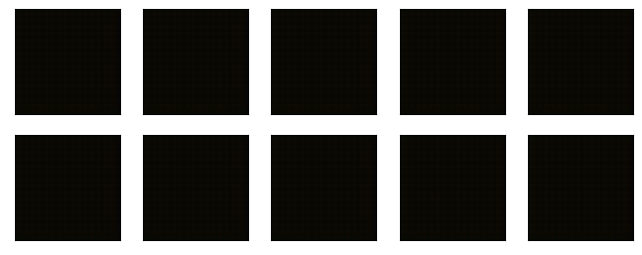

In [38]:
show_list = out
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    plt.imshow(show_list[i].permute(1,2,0).detach().numpy())
plt.show()